In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 
from sklearn.preprocessing import MinMaxScaler

### Show the dataframe shape.

In [2]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
data.shape

(10910, 26)

### Standardize header names.

In [4]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
cols1 = [col_name.lower().replace(' ', '_') for col_name in data.columns]
cols1

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [6]:
data.columns= cols1
data.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [7]:
data = data.drop(["unnamed:_0"], axis = 1)

In [8]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Which columns are numerical?

In [9]:
data.select_dtypes(include=['float64'])

,customer_lifetime_value,months_since_last_claim,number_of_open_complaints,total_claim_amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


### Which columns are categorical?

In [10]:
data.select_dtypes(include=['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


### Check and deal with NaN values.

In [11]:
data.isna().sum().sum()

9254

In [12]:
data.dropna()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,Urban,Married,127,13.0,31,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,Suburban,Single,69,25.0,25,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,Urban,Married,66,26.0,10,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


### Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [13]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date']).dt.to_period('M')
data['effective_to_date']

0        2011-02
1        2011-01
2        2011-02
3        2011-01
4        2011-01
          ...   
10905    2011-01
10906    2011-01
10907    2011-02
10908    2011-02
10909    2011-01
Name: effective_to_date, Length: 10910, dtype: period[M]

In [14]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [15]:
datajan= data.loc[data['effective_to_date'].dt.month == 1]
datajan
  

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
1,KX64629,California,2228.525238,No,Basic,College,2011-01,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
8,FM55990,California,5989.773931,Yes,Premium,College,2011-01,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01,Employed,F,70961,Suburban,Married,85,19.0,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [16]:
datafeb= data.loc[data['effective_to_date'].dt.month == 2]
datafeb

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,WU60905,California,8610.667489,No,Basic,High School or Below,2011-02,Unemployed,F,0,Suburban,Married,111,27.0,36,0.0,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A
10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02,Unemployed,M,0,Suburban,Single,188,5.0,67,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [17]:
datamarch= data.loc[data['effective_to_date'].dt.month == 3]
datamarch

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
### Show DataFrame info
    

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype    
---  ------                         --------------  -----    
 0   customer                       10910 non-null  object   
 1   state                          10279 non-null  object   
 2   customer_lifetime_value        10910 non-null  float64  
 3   response                       10279 non-null  object   
 4   coverage                       10910 non-null  object   
 5   education                      10910 non-null  object   
 6   effective_to_date              10910 non-null  period[M]
 7   employmentstatus               10910 non-null  object   
 8   gender                         10910 non-null  object   
 9   income                         10910 non-null  int64    
 10  location_code                  10910 non-null  object   
 11  marital_status                 10910 non-null  object   
 12  monthly_premium_au

### Describe DataFrame.

In [19]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Show a plot of the total number of responses.

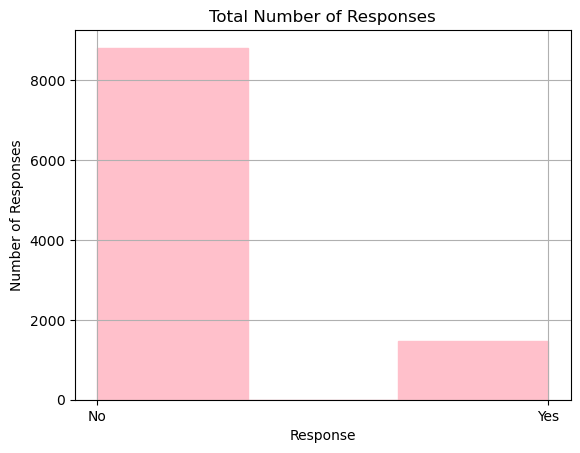

In [20]:
data['response'].hist( bins=3, facecolor='pink',edgecolor='pink')
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()


### Show a plot of the response rate by the sales channel.

In [21]:
response_sales= data.filter(items= ['response', 'sales_channel'])
print(response_sales)

      response sales_channel
0           No         Agent
1           No   Call Center
2           No   Call Center
3          Yes        Branch
4           No        Branch
...        ...           ...
10905       No           Web
10906       No        Branch
10907       No           Web
10908       No        Branch
10909      NaN           Web

[10910 rows x 2 columns]


In [22]:
response_yes= response_sales.loc[response_sales['response'] == 'Yes']
print(response_yes)

      response sales_channel
3          Yes        Branch
8          Yes        Branch
15         Yes        Branch
19         Yes   Call Center
27         Yes         Agent
...        ...           ...
10844      Yes         Agent
10852      Yes   Call Center
10872      Yes         Agent
10887      Yes         Agent
10897      Yes         Agent

[1466 rows x 2 columns]


In [23]:
response_no=response_sales.loc[response_sales['response']== 'No']
print(response_no)

      response sales_channel
0           No         Agent
1           No   Call Center
2           No   Call Center
4           No        Branch
6           No        Branch
...        ...           ...
10904       No        Branch
10905       No           Web
10906       No        Branch
10907       No           Web
10908       No        Branch

[8813 rows x 2 columns]


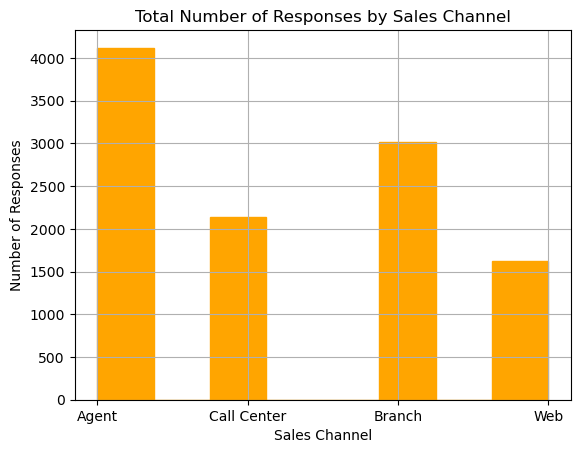

In [24]:
response_sales['sales_channel'].hist(bins= 8, facecolor='orange', edgecolor='orange')
plt.title('Total Number of Responses by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Responses')
plt.show()
                              

Text(0.5, 1.0, 'Total Number of Responses by Sales Channel')

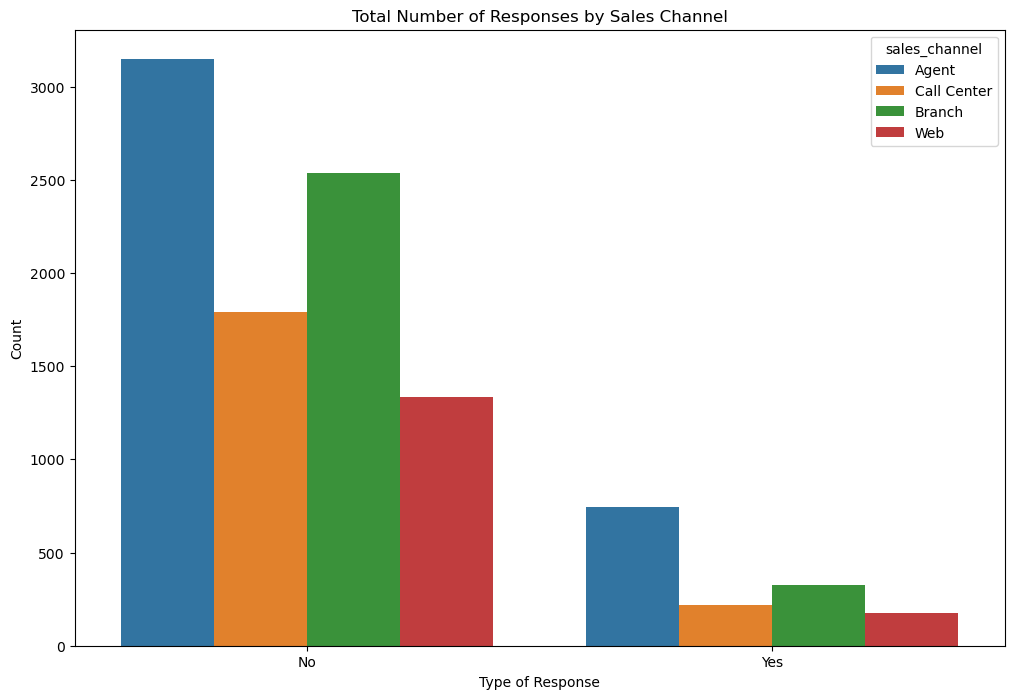

In [25]:
plt.figure(figsize=(12,8))
sns.countplot('response', hue='sales_channel', data=data)
plt.xlabel('Type of Response')
plt.ylabel('Count')
plt.title('Total Number of Responses by Sales Channel')

### Show a plot of the response rate by the total claim amount.

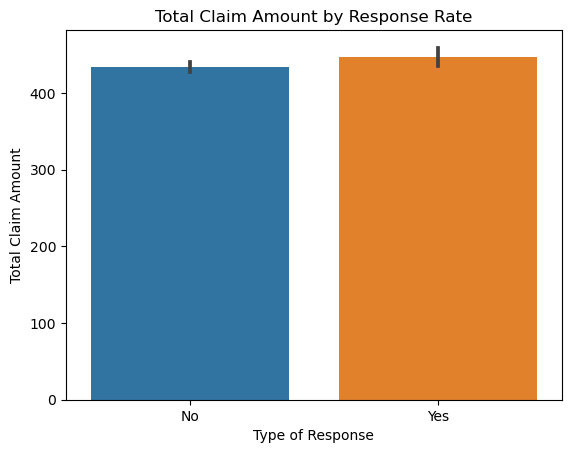

In [26]:
sns.barplot(x='response', y ="total_claim_amount", data = data)
plt.xlabel('Type of Response')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount by Response Rate')
plt.show()


### Show a plot of the response rate by income.

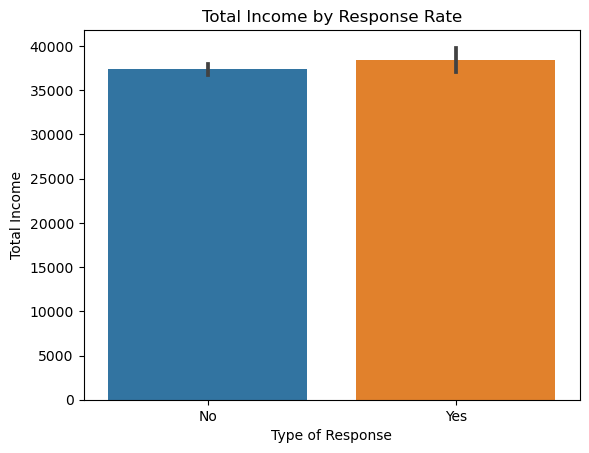

In [27]:
sns.barplot(x='response', y ="income", data = data)
plt.xlabel('Type of Response')
plt.ylabel('Total Income')
plt.title('Total Income by Response Rate')
plt.show()

## Lab | Customer Analysis Round 4

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [28]:
data.info

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employmentstatus gender  income  \
0       Co

In [29]:
data.dtypes

customer                            object
state                               object
customer_lifetime_value            float64
response                            object
coverage                            object
education                           object
effective_to_date                period[M]
employmentstatus                    object
gender                              object
income                               int64
location_code                       object
marital_status                      object
monthly_premium_auto                 int64
months_since_last_claim            float64
months_since_policy_inception        int64
number_of_open_complaints          float64
number_of_policies                   int64
policy_type                         object
policy                              object
renew_offer_type                    object
sales_channel                       object
total_claim_amount                 float64
vehicle_class                       object
vehicle_siz

In [30]:
data_numericals= data.select_dtypes(include=['float'])
data_numericals

,customer_lifetime_value,months_since_last_claim,number_of_open_complaints,total_claim_amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [31]:
data_num = data.select_dtypes(include = np.number)
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [32]:
data_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [33]:
data_categoricals= data.select_dtypes(include=['object'])
data_categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [34]:
data_obj = data.select_dtypes(include = np.number)
data_obj

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


## Now we will try to check the normality of the numerical variables visually
### Use seaborn library to construct distribution plots for the numerical variables

## <font color='coral'>Customer Lifetime Value</font>

In [35]:
clf= data['customer_lifetime_value']
clf

##Why is it a float? hundreds of thousands?

0         4809.216960
1         2228.525238
2        14947.917300
3        22332.439460
4         9025.067525
             ...     
10905    15563.369440
10906     5259.444853
10907    23893.304100
10908    11971.977650
10909     6857.519928
Name: customer_lifetime_value, Length: 10910, dtype: float64

In [36]:
max(clf)

##to estimate number of bins

83325.38119

<function matplotlib.pyplot.show(close=None, block=None)>

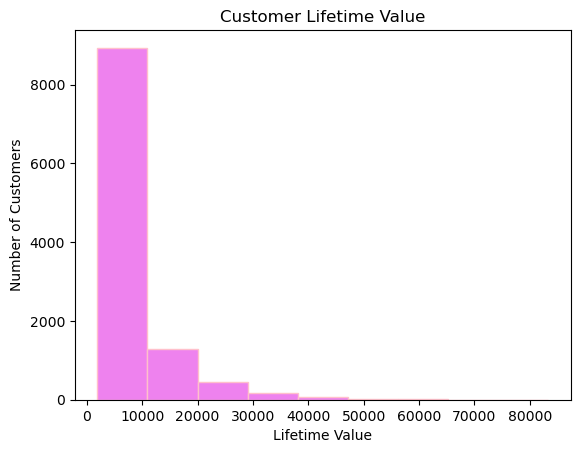

In [37]:
sns.histplot(clf, bins=9 , facecolor='violet', edgecolor= 'pink')
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Customer Lifetime Value')
plt.show

##plot is skewed to the left, with majority of customers having a lifetime value of less than 10k and a few high net worth individuals


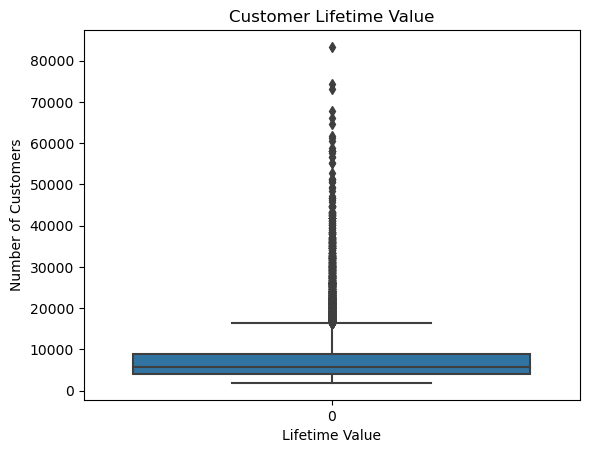

In [38]:
sns.boxplot(data= clf)
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Customer Lifetime Value')
plt.show()

## boxplot confirms skewness of distribution

## <font color='springgreen'> Months Since Last Claim </font>

In [39]:
months = data['months_since_last_claim']
months

0         7.0
1         3.0
2        34.0
3        10.0
4         NaN
         ... 
10905     NaN
10906     7.0
10907    11.0
10908     0.0
10909    31.0
Name: months_since_last_claim, Length: 10910, dtype: float64

In [40]:
months2=months.dropna()
months2

0         7.0
1         3.0
2        34.0
3        10.0
5         2.0
         ... 
10904    14.0
10906     7.0
10907    11.0
10908     0.0
10909    31.0
Name: months_since_last_claim, Length: 10277, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

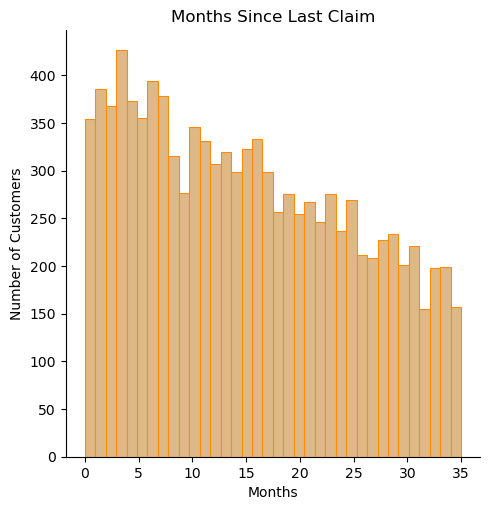

In [41]:
sns.displot(months2, bins=36, facecolor='burlywood', edgecolor='darkorange')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Months Since Last Claim')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

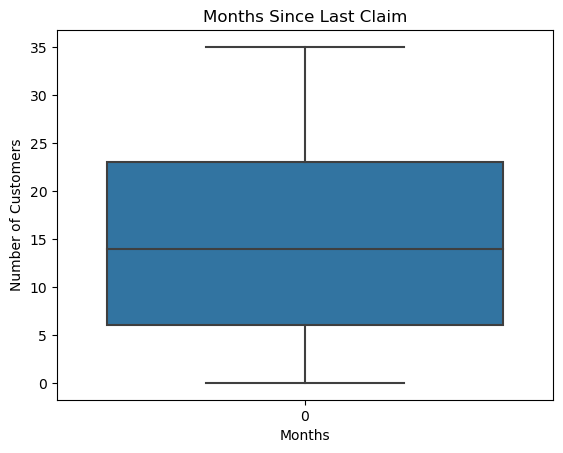

In [42]:
sns.boxplot(data=months2)
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Months Since Last Claim')
plt.show

## <font color='lightpink'>Number of Open Complaints</font>


In [43]:
spillthetea= data['number_of_open_complaints']
spillthetea2= spillthetea.dropna()
spillthetea2

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
10904    0.0
10906    0.0
10907    0.0
10908    4.0
10909    0.0
Name: number_of_open_complaints, Length: 10277, dtype: float64

In [44]:
max(spillthetea2)  ##number of bins, didn't know how many bins to put

5.0

<function matplotlib.pyplot.show(close=None, block=None)>

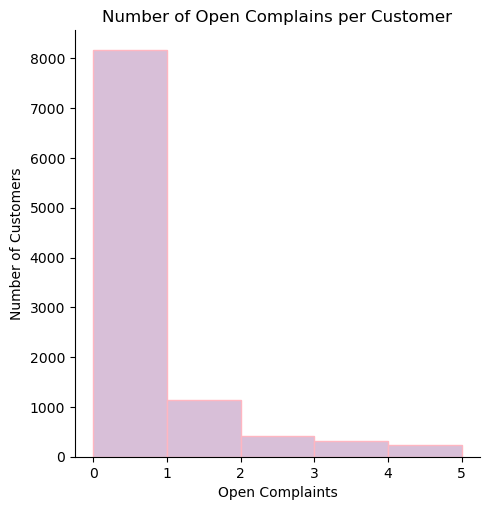

In [45]:
sns.displot(spillthetea2, bins=5, facecolor='thistle', edgecolor='lightpink')
plt.xlabel('Open Complaints')
plt.ylabel('Number of Customers')
plt.title('Number of Open Complains per Customer')
plt.show

##didn't do a boxplot, result turned out funny because it wasn't suited to one

## <font color='slategray'> Total Claim Amount </font>

In [46]:
totalclaimamount= data['total_claim_amount']
totalclaimamount

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10910, dtype: float64

In [47]:
max(totalclaimamount)

2893.239678

<function matplotlib.pyplot.show(close=None, block=None)>

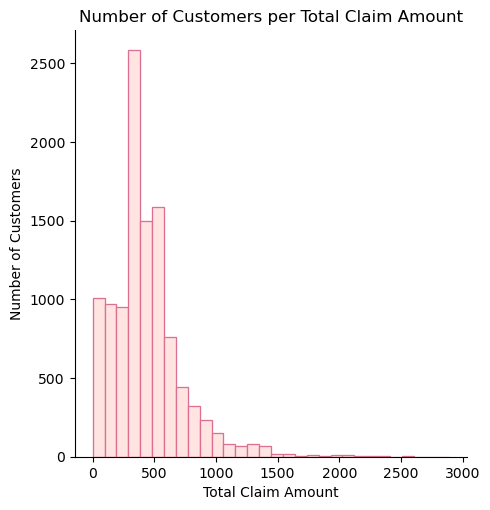

In [48]:
sns.displot(totalclaimamount, bins=30, facecolor='mistyrose', edgecolor='palevioletred')
plt.xlabel('Total Claim Amount')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Total Claim Amount')
plt.show

## most claim amounts are below 500, and claim amounts are most frequently at 300

<function matplotlib.pyplot.show(close=None, block=None)>

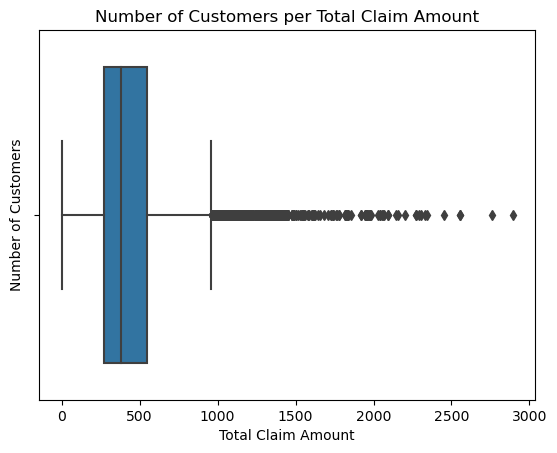

In [49]:
sns.boxplot(totalclaimamount)
plt.xlabel('Total Claim Amount')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Total Claim Amount')
plt.show

##the median claim amount is 300


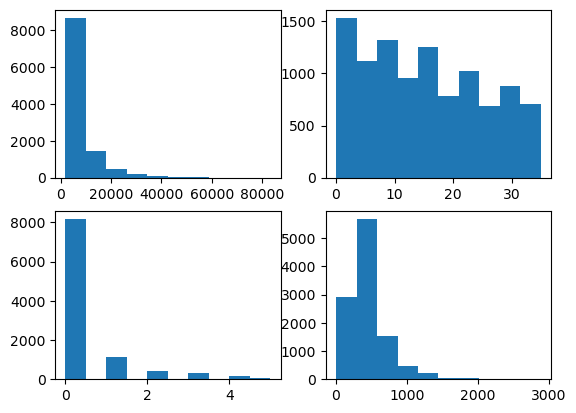

In [50]:
# I can't seem to make subplots using my cleaned dataframes?? (dataframes 'clf', 'months2', 'spillthetea2', and 'totalclaimamount' --see above)

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['customer_lifetime_value'])
axs[0, 1].hist(data['months_since_last_claim'])
axs[1, 0].hist(data['number_of_open_complaints'])
axs[1, 1].hist(data['total_claim_amount'])





plt.show()

##the distribution of all numerical variables are skewed to the left
###how do i adjust the axs numbers?

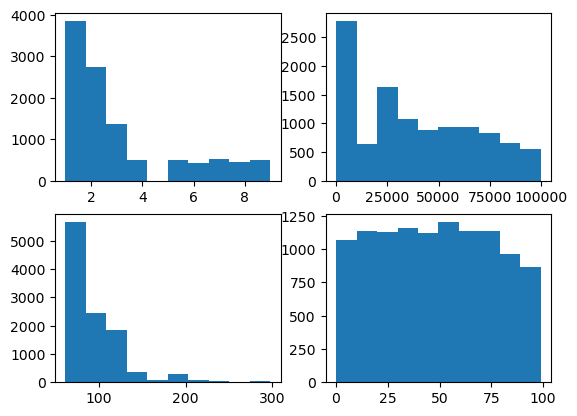

In [51]:
fig, axs = plt.subplots(2, 2)

axs[0, 1].hist(data['income'])
axs[1, 0].hist(data['monthly_premium_auto'])
axs[0, 0].hist(data['number_of_policies'])
axs[1, 1].hist(data['months_since_policy_inception'])

plt.show()

##the distribution of all numerical variables are skewed to the left

## Use Matplotlib to construct histograms

### Customer Lifetime Value

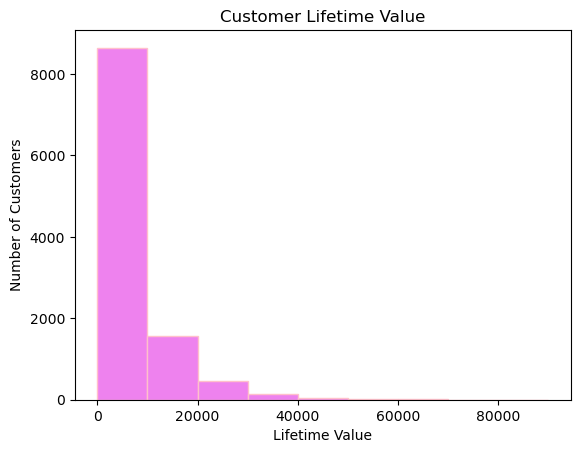

In [52]:
plt.hist(clf, bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], facecolor='violet', edgecolor= 'pink')
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Customer Lifetime Value')
plt.show()


### Months Since Last Claim

<function matplotlib.pyplot.show(close=None, block=None)>

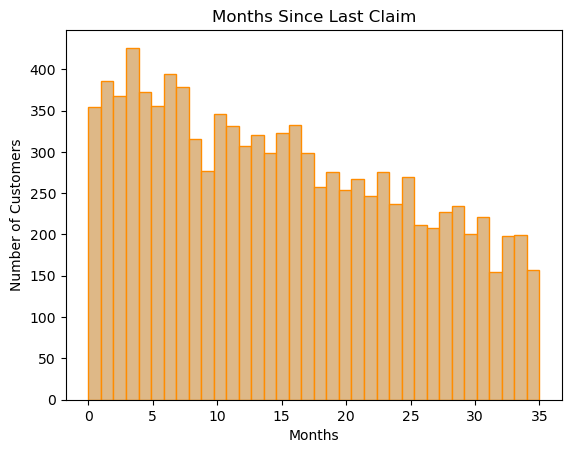

In [53]:
plt.hist(months2, bins=36, facecolor='burlywood', edgecolor='darkorange')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Months Since Last Claim')
plt.show

### Number of Open Complains

<function matplotlib.pyplot.show(close=None, block=None)>

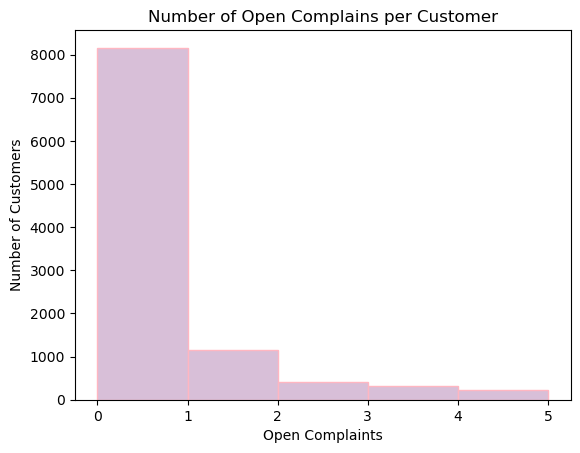

In [54]:
plt.hist(spillthetea2, bins=5, facecolor='thistle', edgecolor='lightpink')
plt.xlabel('Open Complaints')
plt.ylabel('Number of Customers')
plt.title('Number of Open Complains per Customer')
plt.show

### Total Claim Amount

<function matplotlib.pyplot.show(close=None, block=None)>

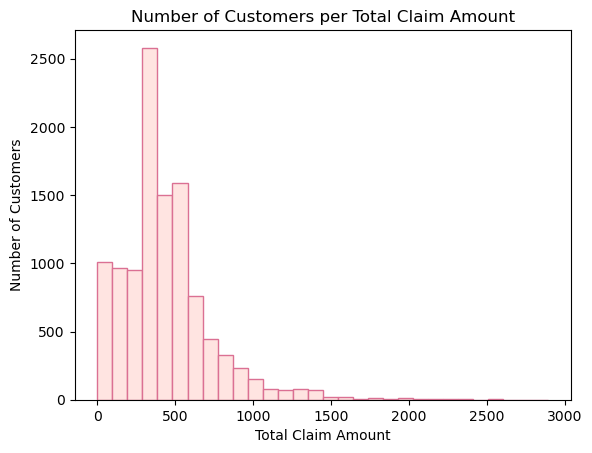

In [55]:
plt.hist(totalclaimamount, bins=30, facecolor='mistyrose', edgecolor='palevioletred')
plt.xlabel('Total Claim Amount')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Total Claim Amount')
plt.show

## Do the distributions for different numerical variables look like a normal distribution?

Answer: No, the distribution all numerical variables are skewed to the left, with the exception of months_since_policy_inception.

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [56]:
data_corr= data_num.corr()
data_corr= round(data_corr,2)
data_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.03,0.40,0.02,0.02,-0.03,0.02,0.23
income,0.03,1.00,-0.01,-0.02,-0.01,0.01,-0.01,-0.35
monthly_premium_auto,0.40,-0.01,1.00,0.01,0.02,-0.01,-0.02,0.63
months_since_last_claim,0.02,-0.02,0.01,1.00,-0.04,0.00,0.01,0.01
months_since_policy_inception,0.02,-0.01,0.02,-0.04,1.00,0.00,-0.01,0.00
number_of_open_complaints,-0.03,0.01,-0.01,0.00,0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.02,0.01,-0.01,0.00,1.00,-0.01
total_claim_amount,0.23,-0.35,0.63,0.01,0.00,-0.01,-0.01,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

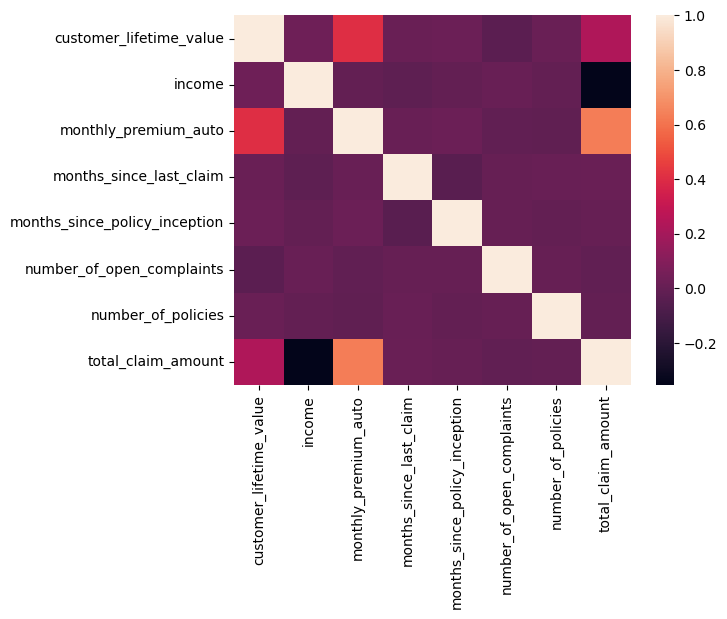

In [57]:
sns.heatmap(data_num.corr())
plt.show

### No, there is no evidence of severe multicollinearity between the independent variables (exc. total_claim_amount, which is the dependent variable). As such, no further action is needed, ie dropping variables

# Lab | Customer Analysis Round 5

## Processing Data
### X-y split.


In [58]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


### Normalize (numerical).

In [59]:
transformer = MinMaxScaler().fit(data_num) 
data_minmax = transformer.transform(data_num) 
print(data_minmax.shape)

(10910, 8)


In [60]:
data_minmax

array([[0.03575222, 0.48038127, 0.        , ..., 0.        , 1.        ,
        0.10117067],
       [0.00405905, 0.        , 0.01265823, ..., 0.        , 0.        ,
        0.25744525],
       [0.16026441, 0.22143207, 0.16455696, ..., 0.        , 0.125     ,
        0.16587544],
       ...,
       [0.27012165, 0.3984457 , 0.5907173 , ..., 0.        , 0.125     ,
        0.13176269],
       [0.12371724, 0.64207199, 0.4092827 , ..., 0.8       , 0.625     ,
        0.21367431],
       [0.06090719, 0.        , 0.16877637, ..., 0.        , 0.25      ,
        0.35311812]])

In [73]:
datanorm= pd.DataFrame(data_minmax, columns=data_num.columns)
datanorm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.087527,0.236795,0.236287,NaN,0.313131,NaN,0.750,0.244657


In [81]:
datanorm2= datanorm.dropna()
datanorm2


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
5,0.034966,0.505586,0.000000,0.057143,0.737374,0.0,0.750,0.101171
...,...,...,...,...,...,...,...,...
10904,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,0.310217
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094333
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131763
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.213674


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

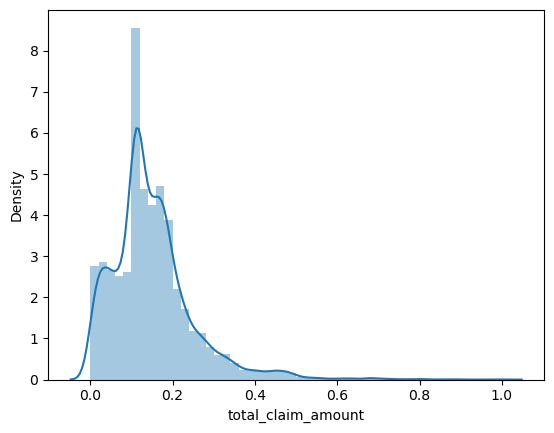

In [82]:
sns.distplot(datanorm2['total_claim_amount'])